# Importing libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns 

#data preprocessing
from sklearn.preprocessing import LabelEncoder

#clustering model library
from sklearn.cluster import KMeans

# Data Description

In [2]:
data = pd.read_csv("C:/Users/Naznin Naznin/Machine Learning Notebooks/mcdonalds.csv")

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
data.shape

(1453, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


# Segmentation Variables

In [6]:
seg_vars = data.iloc[:, 1:11]
seg_vars.head()

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No


In [7]:
type(seg_vars)

pandas.core.frame.DataFrame

In [8]:
seg_vars.columns

Index(['convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty',
       'expensive', 'healthy', 'disgusting'],
      dtype='object')

In [9]:
seg_vars[seg_vars['spicy'] == 'Yes']

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
2,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
6,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No
22,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes
23,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No
42,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...
1347,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No
1355,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes
1389,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No
1397,Yes,Yes,No,No,Yes,No,Yes,No,No,No


# Data Exploration

In [10]:
for col in seg_vars.columns:
    print("Percentage of Yes for", col , round(len(seg_vars[seg_vars[col] == 'Yes'])/len(seg_vars) * 100, 2))

Percentage of Yes for convenient 90.78
Percentage of Yes for spicy 9.36
Percentage of Yes for fattening 86.72
Percentage of Yes for greasy 52.65
Percentage of Yes for fast 90.02
Percentage of Yes for cheap 59.88
Percentage of Yes for tasty 64.42
Percentage of Yes for expensive 35.79
Percentage of Yes for healthy 19.89
Percentage of Yes for disgusting 24.29


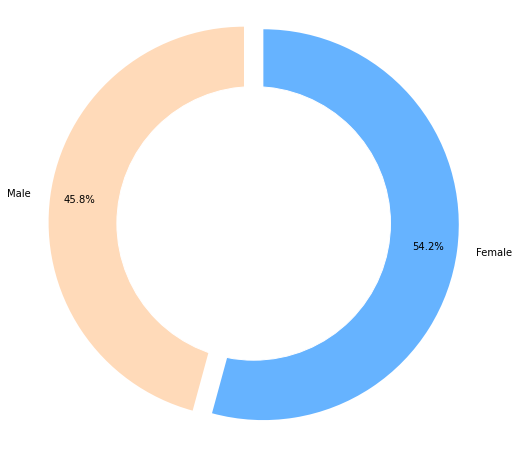

In [11]:
labels = ['Male','Female']
sizes = [data.query('Gender == "Male"').Gender.count(),data.query('Gender == "Female"').Gender.count()]
#colors
colors = ['#ffdaB9','#66b3ff']
#explsion
explode = (0.05,0.05)
plt.figure(figsize=(8,8)) 
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85,explode=explode)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


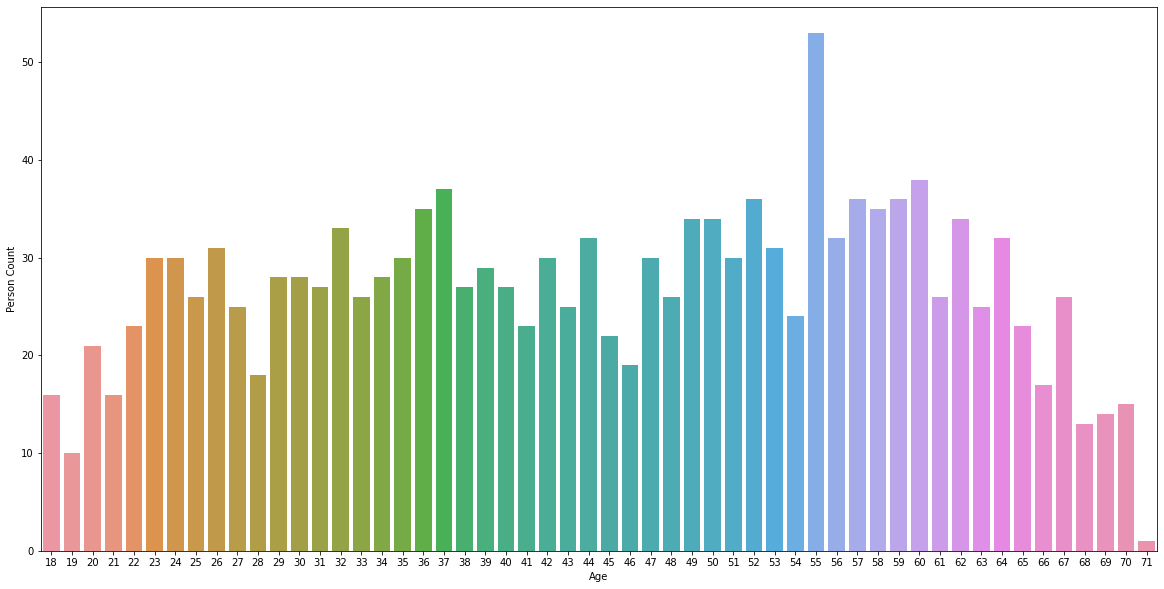

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(data.Age)
plt.xlabel("Age")
plt.ylabel("Person Count")
plt.show()

# Data Pre-processing

In [13]:
encoder = LabelEncoder()
for col in seg_vars.columns:
    seg_vars[col] = encoder.fit_transform(seg_vars[col])

In [14]:
seg_vars

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,1,0,1,0,1,1,0,1,0,0
1,1,0,1,1,1,1,1,1,0,0
2,1,1,1,1,1,0,1,1,1,0
3,1,0,1,1,1,1,1,0,0,1
4,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,1,0,0,0,1,0,1
1449,1,0,1,0,0,1,1,0,1,0
1450,1,0,1,0,1,0,1,1,0,0
1451,1,0,0,0,1,1,1,0,1,0


# Segmentation using K-Means

C:\Users\Naznin Naznin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


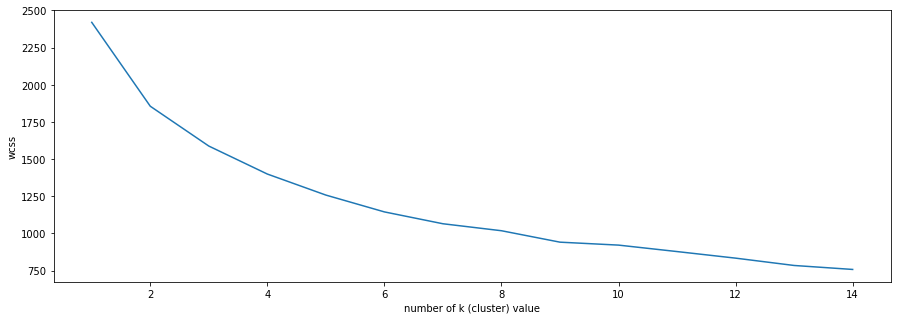

In [15]:
wcss = []
for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(seg_vars)
    wcss.append(kmeans.inertia_)

# the best value is elbow value. It's 5.
plt.figure(figsize=(15,5))
plt.plot(range(1,15),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4)
data_predict = kmeans.fit_predict(seg_vars)
seg_vars['segment'] = data_predict

In [17]:
seg_vars

,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,segment
0,1,0,1,0,1,1,0,1,0,0,3
1,1,0,1,1,1,1,1,1,0,0,0
2,1,1,1,1,1,0,1,1,1,0,2
3,1,0,1,1,1,1,1,0,0,1,0
4,1,0,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,1,0,1,1,0,0,0,1,0,1,1
1449,1,0,1,0,0,1,1,0,1,0,3
1450,1,0,1,0,1,0,1,1,0,0,2
1451,1,0,0,0,1,1,1,0,1,0,3


# Segments Description

In [18]:
segment_0 = seg_vars[seg_vars['segment'] == 0]

In [19]:
segment_0.shape

(445, 11)

In [20]:
segment_1 = seg_vars[seg_vars['segment'] == 1]

In [21]:
segment_1.shape

(249, 11)

In [22]:
segment_2 = seg_vars[seg_vars['segment'] == 2]

In [23]:
segment_2.shape

(267, 11)

In [24]:
segment_3 = seg_vars[seg_vars['segment'] == 3]

In [25]:
segment_3.shape

(492, 11)

In [26]:
for col in segment_0.columns:
    print("Percentage of Yes for", col , round(len(segment_0[segment_0[col] == 1])/len(segment_0) * 100, 2))

Percentage of Yes for convenient 94.16
Percentage of Yes for spicy 11.91
Percentage of Yes for fattening 97.75
Percentage of Yes for greasy 100.0
Percentage of Yes for fast 95.96
Percentage of Yes for cheap 94.16
Percentage of Yes for tasty 65.84
Percentage of Yes for expensive 8.31
Percentage of Yes for healthy 15.06
Percentage of Yes for disgusting 29.66
Percentage of Yes for segment 0.0


In [27]:
for col in segment_1.columns:
    print("Percentage of Yes for", col , round(len(segment_1[segment_1[col] == 1])/len(segment_1) * 100, 2))

Percentage of Yes for convenient 67.47
Percentage of Yes for spicy 6.83
Percentage of Yes for fattening 91.97
Percentage of Yes for greasy 71.49
Percentage of Yes for fast 70.28
Percentage of Yes for cheap 6.43
Percentage of Yes for tasty 0.8
Percentage of Yes for expensive 83.53
Percentage of Yes for healthy 2.81
Percentage of Yes for disgusting 63.86
Percentage of Yes for segment 100.0


In [28]:
for col in segment_2.columns:
    print("Percentage of Yes for", col , round(len(segment_2[segment_2[col] == 1])/len(segment_2) * 100, 2))

Percentage of Yes for convenient 95.88
Percentage of Yes for spicy 9.74
Percentage of Yes for fattening 88.39
Percentage of Yes for greasy 53.18
Percentage of Yes for fast 85.77
Percentage of Yes for cheap 0.0
Percentage of Yes for tasty 97.75
Percentage of Yes for expensive 97.75
Percentage of Yes for healthy 21.72
Percentage of Yes for disgusting 11.24
Percentage of Yes for segment 0.0


In [29]:
for col in segment_3.columns:
    print("Percentage of Yes for", col , round(len(segment_3[segment_3[col] == 1])/len(segment_3) * 100, 2))

Percentage of Yes for convenient 96.75
Percentage of Yes for spicy 8.13
Percentage of Yes for fattening 73.17
Percentage of Yes for greasy 0.0
Percentage of Yes for fast 96.95
Percentage of Yes for cheap 88.41
Percentage of Yes for tasty 77.24
Percentage of Yes for expensive 2.85
Percentage of Yes for healthy 31.91
Percentage of Yes for disgusting 6.5
Percentage of Yes for segment 0.0
